In [2]:
from utils import *
import torch
import torch.utils.data
from model_architectures import SaliencyModel
from collections import OrderedDict
from scipy.misc import imresize
from scipy.ndimage import imread
import matplotlib.pyplot as plt

In [3]:
# Load Model

device = torch.device('cpu')
model = SaliencyModel()
state_dict = torch.load('new_model_exp1/saved_models/train_model_latest', map_location=device)

temp_state_dict = state_dict['network']
new_state_dict = OrderedDict()

for k, v in temp_state_dict.items():
    name = k[6:] # remove `network.`
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)

In [18]:
# Load Data

imgs = load_array('salicon_images')
testset = imgs[14500:]
testset = np.expand_dims(testset, axis=1)
test_data = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False ,num_workers=2)



In [19]:
model.eval()

imgs = []
error_maps_8 = []
error_maps_32 = []
error_maps_64 = []

for x in test_data:
    
    y1 = np.zeros((64, 64))
    y2 = np.zeros((32, 32))
    y3 = np.zeros((8, 8))

    label1 = imresize(x[0][0], (64, 64))
    label2 = imresize(x[0][0], (32, 32))
    label3 = imresize(x[0][0], (8, 8))
    y1 = label1
    y2 = label2
    y3 = label3

    x = torch.tensor(x).float()
    
    out1, out2, out3 = model.forward(x)
    out1 = out1.detach().numpy()
    out2 = out2.detach().numpy()
    out3 = out3.detach().numpy()
    
    error_map_64 = abs(normalise(out1[0][0]) - normalise(y1))
    error_map_32 = abs(normalise(out2[0][0]) - normalise(y2))
    error_map_8 = abs(normalise(out3[0][0]) - normalise(y3))
    
    error_maps_8.append(error_map_8)
    error_maps_32.append(error_map_32)
    error_maps_64.append(error_map_64)
    imgs.append(x[0][0])
    
    

/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  from ipykernel import kernelapp as app
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  app.launch_new_instance()


In [20]:
test_data2 = []
img1 = imresize(imread('popout/popout1.png', mode='L'), (128,128))
img2 = imresize(imread('popout/popout2.jpg', mode='L'), (128,128))
img3 = imresize(imread('popout/popout3.jpg', mode='L'), (128,128))
test_data2.append(img1)
test_data2.append(img2)
test_data2.append(img3)
#6, 18, 23, 134

/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [10]:
imgs = []
error_maps_8_2 = []
error_maps_32= []
error_maps_64 = []
plt.gray()
for x in test_data2:
    
    y1 = np.zeros((64, 64))
    y2 = np.zeros((32, 32))
    y3 = np.zeros((8, 8))
    
    label1 = imresize(x, (64, 64))
    label2 = imresize(x, (32, 32))
    label3 = imresize(x, (8, 8))
    y1 = label1
    y2 = label2
    y3 = label3
    
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    x = torch.tensor(x).float()
    
    out1, out2, out3 = model.forward(x)
    out1 = out1.detach().numpy()
    out2 = out2.detach().numpy()
    out3 = out3.detach().numpy()
    
    error_map_64 = abs(normalise(out1[0][0]) - normalise(y1))
    error_map_32 = abs(normalise(out2[0][0]) - normalise(y2))
    error_map_8 = abs(normalise(out3[0][0]) - normalise(y3))
    
    error_maps_8.append(error_map_8)
    error_maps_32.append(error_map_32)
    error_maps_64.append(error_map_64)
    imgs.append(x[0][0])

/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  del sys.path[0]
/anaconda2/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


<Figure size 432x288 with 0 Axes>

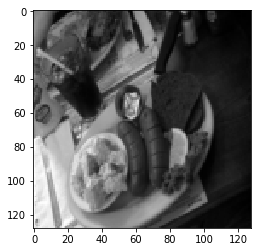

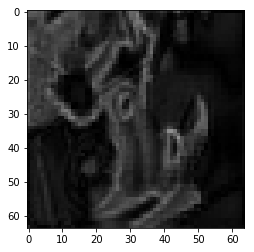

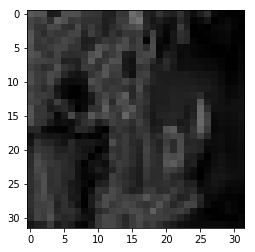

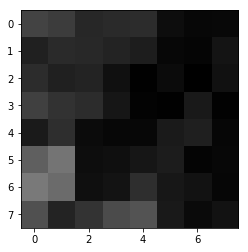

In [39]:
img = 55

plt.imshow(imgs[img])
plt.show()

plt.imshow(error_maps_64[img], vmin=0, vmax=1)
plt.show()
plt.imshow(error_maps_32[img], vmin=0, vmax=1)
plt.show()
plt.imshow(error_maps_8[img], vmin=0, vmax=1)
plt.show()

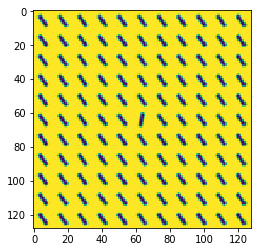

In [64]:
plt.imshow(imgs[2])
plt.show()